In [2]:
'''
A1 Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following
activities.

A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.

A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.
'''

import pandas as pd
import numpy as np
df = pd.read_csv('purchase.csv')

print(df.to_string()) 
A = df[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
dim=df.to_numpy().shape
print("dimentionality of dataset is:",dim)
print("number of vectors is :",dim[0])
matA = A.values
C= df['Payment (Rs)']
matC=C.values
print("Matrix A:\n", matA)
rank = np.linalg.matrix_rank(matA)
print("rank of matrix A is ", rank)
print("Matrix C:\n", matC)
invA=np.linalg.pinv(matA)
print("Inverse of A:\n", invA)
res = np.dot(invA,matC)
print("Matrix X:\n",res)

df['RICH/POOR'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
print(df.to_string())

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
dimentionality of dataset is: (10, 5)
number of vectors is : 10
Matrix A:
 [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
rank of matrix A is  3
Matrix C:
 

             Date Month  Day     Price      Open      High       Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2,081.85  2,092.00  2,126.90  2,065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2,077.75  2,084.00  2,112.45  2,068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2,068.85  2,084.35  2,088.50  2,053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2,072.95  2,098.00  2,098.00  2,066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2,078.25  2,102.00  2,111.40  2,072.00  809.62K   
..            ...   ...  ...       ...       ...       ...       ...      ...   
244  Jul 07, 2020   Jul  Tue  1,397.40  1,410.00  1,411.00  1,390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1,400.75  1,405.50  1,415.50  1,394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1,405.10  1,415.00  1,425.00  1,398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1,412.35  1,440.00  1,467.80  1,395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1,363.05  1,363.65  1,377.00  1,356.00  383.00K   

       Chg%  
0     0.20%  

C:\Users\Shashank\AppData\Local\Temp\ipykernel_28876\1579139681.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_prices['Chg%'] = wednesday_prices['Chg%'].str.rstrip('%').astype(float)


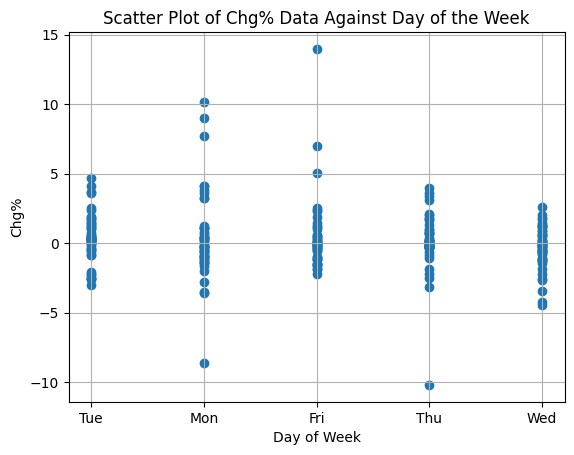

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

irctcDF = pd.read_csv('IRCTC.csv')
print(irctcDF)
irctcDF['Price'] = irctcDF['Price'].str.replace(',', '').astype(float)

mean_price = irctcDF['Price'].mean()
var_price = irctcDF['Price'].var()
print("Mean Price:", mean_price)
print("Variance Price:", var_price)

wednesday_prices = irctcDF[irctcDF['Day'] == 'Wed']
wednesday_mean = wednesday_prices['Price'].mean()
population_mean = irctcDF['Price'].mean()
print("Wednesday Prices:\n", wednesday_prices)
print("Sample Mean (Wednesdays):", wednesday_mean)
print("Population Mean:", population_mean)


irctcDF['Date'] = pd.to_datetime(irctcDF['Date'])
april_prices = irctcDF[irctcDF['Date'].dt.month == 4]
april_mean = april_prices['Price'].mean()

print("April Prices:\n", april_prices)
print("Sample Mean (April):", april_mean)
print("Population Mean:", population_mean)
irctcDF['Chg%'] = irctcDF['Chg%'].str.rstrip('%').astype(float)
loss_count = irctcDF['Chg%'].apply(lambda x: 1 if x<0 else 0).sum()
total_count = irctcDF['Chg%'].count()

prob_loss = loss_count/total_count
print(f'probability of loss {prob_loss:.4f}')

wednesday_prices['Chg%'] = wednesday_prices['Chg%'].str.rstrip('%').astype(float)
wed_profit_count = wednesday_prices['Chg%'].apply(lambda x: 1 if x>0 else 0).sum()

total_wed = wednesday_prices['Chg%'].count()
wed_profit = wed_profit_count / total_wed
print(f'probability of profit on wednesday {wed_profit:.4f}')
cond_prob_wed = wed_profit_count/total_wed
print(f'conditional probability of profit on wednesday {cond_prob_wed:.4f}')


# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(irctcDF['Day'], irctcDF['Chg%'])
# plt.xticks(list(day_to_num.values()), list(day_to_num.keys()))
plt.xlabel('Day of Week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% Data Against Day of the Week')
plt.grid(True)
plt.show()